# Topology generation for UAV designs using Pacti


<img src="https://raw.githubusercontent.com/FormalSystems/media/main/case_studies/uav_topologies/grammar-1.png" alt="grid" style="width: 1000px;"/>




We demonstrate how pacti can be utilized to generate designs for Unmanned Aerial Vehicles (UAVs) under a set of predefined "design rules". Our primary objective is to produce a 3D grid, consisting of interconnected points that represent the abstract topology of the UAV. Each point within the grid represents a specific component of the UAV, such as fuselage, wing, rotor, etc., while each edge between two points depicts the connection among components. To achieve this, we employ a context-sensitive grammar (CSG) that formalizes the placement of UAV components on the grid based on their local context, i.e., the components around them.

Our grammar's primary goal is to generate all legal configurations of components and their connections within the 3D grid. A context-sensitive grammar (CSG) is a formal grammar that describes a formal language through a set of rules that define how strings of symbols within the language can be generated.

In the following, we introduce the main building blocks of our grammar: grid, context, symbols, and rules. By leveraging these components, our proposed method generates UAV designs that adhere to predefined design rules, resulting in functional and efficient UAV designs.

## Grid

A 3D grid of points, or simply a grid, can be formally defined as a set of ordered triplets, where each triplet represents a point in 3D space. The triplet is composed of three integer coordinates $(x, y, z)$ that specify the position of the point in the 3D grid. Let $n_{half} \in \mathbb{Z}$, and let $G = {(x, y, z) | x, y, z \in \mathbb{Z}, -n_{half} \leq x, y, z \leq n_{half}}$ be the set of all points in a 3D grid. We define the size of a grid $G$ as $|G| = ((n_{half} * 2) + 1)^3$.

Below, we present an example of a grid of size 27, and we highlight the middle point of the grid, which has coordinates $(0,0,0)$:


<img src="https://raw.githubusercontent.com/FormalSystems/media/main/case_studies/uav_topologies/grid-1.png" alt="grid" style="width: 400px;"/>


Using the defined grid structure, we can easily specify the position of each component of the UAV in the form of a 3D point. This facilitates the use of a context-sensitive grammar to formalize the placement of components on the grid.




## Context

Given a 3D grid of points, we define the context of a point $p$ as a tuple of seven points, where six points are the coordinates of the adjacent points in the grid and one point is $p$ itself. We define a set of seven directions $\Delta = (\texttt{ego}, \texttt{front}, \texttt{rear}, \texttt{left}, \texttt{right}, \texttt{top}, \texttt{bottom})$. Given a point $p = (x, y, z)$, we can construct its context $Ctx(p) = (p_\texttt{ego}, p_\texttt{front}, p_\texttt{rear}, p_\texttt{left}, p_\texttt{right}, p_\texttt{top}, p_{bottom})$ as follows:

$$
\begin{align}
p_\texttt{ego} &= (x, y, z) \\
p_\texttt{front} &= (x, y+1, z) \\
p_\texttt{rear} &= (x, y-1, z) \\
p_\texttt{left} &= (x-1, y, z) \\
p_\texttt{right} &= (x+1, y-1, z) \\
p_\texttt{top} &= (x+1, y-1, z+1) \\
p_\texttt{bottom} &= (x+1, y-1, z-1)
\end{align}
$$

Below we show an example of a grid together with context of the point $(0,0,0)$


<img src="https://raw.githubusercontent.com/FormalSystems/media/main/case_studies/uav_topologies/grid_local_context-1.png" alt="grid_local_context" style="width: 500px;"/>




Note that the points at the edge of the grid have contexts with some points having coordinates outside the grid, i.e., the points adjacent to them in the specified direction are not included in the grid. The context of a point is used to define the placement of components of an UAV in the grid according to their local context.



## Symbols

In our grammar, each point $p$ in the grid is associated with a symbol, denoted by $Sym(p)$. The symbols are divided into two main categories: terminal symbols and nonterminal symbols. Terminal symbols represent actual characters or words in the language that the grammar defines, while nonterminal symbols are used to represent groups or structures in the language. These symbols can be expanded or rewritten by the production rules of the grammar to generate strings in the language.

We define the set of terminal symbols as $\Lambda$, which contains five elements that mostly represent UAV components: ${\texttt{Fuselage}, \texttt{Rotor}, \texttt{Wing}, \texttt{Connector}, \texttt{Empty}}$. We define the set of nonterminal symbols as $\Theta$, which contains one element: ${\texttt{Unoccupied}}$.

Note that although $\texttt{Empty}$ and $\texttt{Unoccupied}$ represent the same concept (i.e., the absence of a component), they are different symbols. $\texttt{Empty}$ is terminal, meaning it cannot be expanded into a new symbol, while $\texttt{Unoccupied}$ is nonterminal.

At initialization, all points in the grid are associated with the $\texttt{Unoccupied}$ symbol.

We associate each symbol with a color, as shown in the figure below:


<img src="https://raw.githubusercontent.com/FormalSystems/media/main/case_studies/uav_topologies/symbols-1.png" alt="symbols" style="width: 700px;"/>



### Local Context

A local context $LC=(sym_1, sym_2, \dots, sym_7)$ is a tuple of seven symbols, i.e. $l_c \in \Lambda \cup \Theta$, one for each direction in $\Delta$. The figure below shows a local context $LC_i = (\texttt{Unoccupied}, \texttt{Unoccupied}, \texttt{Unoccupied}, \texttt{Fuselage}, \texttt{Unoccupied}, \texttt{Rotor}, \texttt{Unoccupied})$.


<img src="https://raw.githubusercontent.com/FormalSystems/media/main/case_studies/uav_topologies/local-1.png" alt="symbols" style="width: 400px;"/>


### State

The state of a point $p$ on a grid is the local context around that point, denoted by $S(p)$.

For example, given the grid depicted below, let us consider the point $p=(0,0,0)$. We have that $S(p)=(\texttt{Fuselage}, \texttt{Unoccupied}, \texttt{Unoccupied}, \texttt{Wing}, \texttt{Wing}, \texttt{Rotor}, \texttt{Unoccupied})$. In the picture below, we have associated a color with each symbol.


<img src="https://raw.githubusercontent.com/FormalSystems/media/main/case_studies/uav_topologies/local_context-1.png" alt="Local Context" style="width: 700px;"/>

Check [src/grammar/grid.py](src/grammar/grid.py) for the implementation of the grid and local context.

## Rules

In our grammar a production rule, or rule, defines how a single nonterminal symbol can be substituted with a non-terminal symbol according to its context.


In our grammar, a production rule, or simply a rule, defines how a single nonterminal symbol can be substituted with another non-terminal symbol based on its context.

A rule $R_i = (\Omega, \Pi)$ consists of a condition $\Omega$ and a production $\Pi$, where:

1. $\Omega=\{LC_0, LC_1, ..., LC_c\}$ is a set of $c$ local contexts.
2. $\Pi = (sym, \texttt{dir})$ where $sym \in \Lambda$ and $\texttt{dir} \in \Delta$.


The condition $\Omega$ determines all the local contexts where the rule can be applied. The production $\Pi$ specifies the nonterminal symbol $sym \in Tau$ to be produced and the direction of the edge that connects the newly generated symbol to one of the adjacent symbols in the grid. If no connection is required, then $\texttt{dir}$ is simply $\texttt{ego}$.



### Matching

At each time step, we apply a rule to a point in the grid.
A rule $R_i$ _matches_ with a point $p$ if the local context of $p$, i.e. $S(p)$, is a subset of the conditions of $R_i$, i.e. if $S(p) \subseteq \Omega$. If a rule $R_i = (\Omega, \Pi)$ matches with a point $p$, then the production $\Pi$ is applied to the point $p$. That is, let $\Pi=(sym, p_{dir})$, then the symbol $sym$ is placed in $p$, i.e. $Sym(p)=sym$, and an edge is created from $p$ to $p_{dir}$. The figure below shows an example of a grid at a time step $t$, where a point $p$ matches a rule $R_i$, and the production of $R_i$ is applied to $p$, modifying the state of the grid in the next time step $t+1$.

<img src="https://raw.githubusercontent.com/FormalSystems/media/main/case_studies/uav_topologies/match-1.png" alt="Rule Matching" style="width: 1000px;"/>



## Grammar and design generation process


Given $n$ rules, a grammar $Gr={R_0, R_1, \dots , R_n}$ is simply the set of all rules.

We start with a grid where all points are associated with the nonterminal symbol _Unassigned_. Then, at discrete time-steps, we choose a point in the grid and try to match it with one or more rules in the grammar. If a rule matches the local context of the chosen point, we apply the production of the rule to the point, which changes its nonterminal symbol and potentially creates edges between adjacent points. We repeat this process until all points contain nonterminal symbols or until we have no rules matching in the grammar.


# Contract formalization with Pacti

We can use _pacti_ as verification engine to match rules with points on the grid.
We are going to use the _composition_ and _refinement_ operators to verify weather local contexts of points match rule's conditions. In the following we are going to formalize local contexts and rules with contracts of polyhedra constraints.

We can use _pacti_ as a verification engine to match rules with points on the grid.
We are going to use the _composition_ and _refinement_ operators to verify weather local contexts of points match rule's conditions. To do this, we will define contracts using polyhedral constraints to formalize local contexts and rules.


## Local directions as linear constraint

We will define a variable for every terminal and nonterminal symbol of the grammar and an integer for every direction.
For example, given the grammar with nonterminal symbols $\Lambda={\texttt{Fuselage}, \texttt{Rotor}, \texttt{Wing}, \texttt{Connector}, \texttt{Empty}}$ and terminal symbol $\Theta={\texttt{Unoccupied}}$, we generate a set of variables $V = {f, r, w, c, e, u}$ where each element corresponds to the element in $\Lambda \cup \Theta$ starting with the corresponding letter.
We define a set of integers $\Delta'={0,1,2,3,4,5,6}$ where every element corresponds to an element in $\Delta={\texttt{ego}, \texttt{front}, \texttt{rear}, \texttt{left}, \texttt{right}, \texttt{top}, \texttt{bottom}}$.
Our goal is to represent a local context with linear constraints such as $U \le 6~~ \land~~ F = 7$, which prescribe a local context having $\texttt{Unoccupied}$ in the direction corresponding to the integers $i \in \Delta'$ where $i \leq 6$ and a $\texttt{Fuselage}$ in the direction corresponding to the integer $7$. From this example we can see how the assignment of integers in $\Delta'$ to directions in $\Delta$ can greatly influence the number of constraints necessary to express a set of local contexts. 




### Direction assignment problem

We have seen how from a local context we can produe a set of local constraints that represents it.

Given a grammar with $n$ rules $Gr=\{R_0, R_1, \dots , R_n\}$ where every rule $R_i \in Gr$ contains a set if local contexts, e.g. $\Omega_i = \{LC_0, LC_1, \dots, LC_c\}$; given a set of seven directions $\Delta=\{\texttt{ego}, \texttt{front}, \texttt{rear}, \texttt{left}, \texttt{right}, \texttt{top}, \texttt{bottom}\}$; 
Produce a function $Dir: \Delta \rightarrow \Delta'$ that maps elements of $\Delta$ to elements of $\Delta'=\{0,1, 2,3,4,5,6\}$ such that it minimizes the number of constraints representing the local contexts for all the rules in the grammar.

Check the method `get_directions_assignment` in [src/grammar/grammar.py](src/grammar/grid.py) for the implementation of the such function.

For the grammar in our case study the optimal assignment is the following:

$$
\begin{align}
Dir(\texttt{ego}) &= 6 \\
Dir(\texttt{front}) &= 4 \\
Dir(\texttt{rear}) &= 5 \\
Dir(\texttt{left}) &= 0 \\
Dir(\texttt{right}) &= 2 \\
Dir(\texttt{top}) &= 3 \\
Dir(\texttt{bottom}) &= 1
\end{align}
$$




## Contracts for State

We can transform any state of a point $p$ in the grid into a contract having _true_ assumptions and the set of linear constraints representing the state as _guarantees_.

For example, let us consider the state in the figure below:

<img src="https://raw.githubusercontent.com/FormalSystems/media/main/case_studies/uav_topologies/state_example-1.png" alt="Rule Matching" style="width: 350px;"/>

We have annotated all the edges with a tuple containing respectively the integer assignment of the direction and the variable representing the symbol. The contract representing the state in the figure is the following:


$$
\begin{align}
  \mathcal{C}_{s(t)} &=
      \begin{cases}
        A & true \\
          &  \\
        G & f=4 \land (u \leq 3 \lor (4 \leq u \leq 5))\\
      \end{cases}\notag
\end{align}
$$

Notice that the guarantees of $C_{s(t)}$ contain a _disjunction_. Since in _pacti_ contracts can only have conjunctions of constraints, we distribute the disjunction and create new contracts that we group in a structure that we refer as _ContractUnions_

$$
\begin{cases}
      & \mathcal{C}_{s(t)}^{1}
      \begin{cases}
        A & true \\
          &  \\
        G & f=4 \land u \leq 3\\
      \end{cases}\notag\\
      & \mathcal{C}_{s(t)}^{2}
      \begin{cases}
        A & true \\
          &  \\
        G & f=4 \land (5 \leq u \leq 6))\\
      \end{cases}\notag
    \end{cases}
$$





## Contracts for Rules

Let us show how rules can be modeled as contracts. The figure below shows a pictorial representation of one rule having four local contexts as matching conditions and producing a symbol and a connection.




<img src="https://raw.githubusercontent.com/FormalSystems/media/main/case_studies/uav_topologies/rule_example-1.png" alt="Rule Example" style="width: 750px;"/>




The conditions describe four different states where from the ego position we can have in front a fuselage (red), a propeller (green), a wing (blue), and a connector (grey). The production prescribes the ego symbol to be a connector and a connection to the symbol in front of it. We represent the rule with a _ContractUnion_ formed by four contracts.



$$
    \begin{cases}
      & \mathcal{C}_{r_{i}}^{1}
      \begin{cases}
        A & \land c=4 \land u=5 \land f=4 \land w=4 \land r=4 \\
        G & c=6 \land edge=4\\
      \end{cases}\notag\\
      & \mathcal{C}_{r_{i}}^{2}
      \begin{cases}
        A & \land c=4 \land u \leq 3 \land f=4 \land w=4 \land r=4 \\
        G & c=6 \land edge=4\\
      \end{cases}\notag\\
      & \mathcal{C}_{r_{i}}^{3}
      \begin{cases}
        A & \land c=4 \land u=5 \land f=4 \land w=4 \land r=4 \\
        G & c=6 \land edge=4\\
      \end{cases}\notag\\
      & \mathcal{C}_{r_{i}}^{4}
      \begin{cases}
        A & \land c=4 \land u \leq 3 \land f=4 \land w=4 \land r=4 \\
        G & c=6 \land edge=4
      \end{cases}\notag
    \end{cases}
$$


The assumptions of the contract represent all possible conditions that are accepted by the rule, while the guarantees specify the symbol to be placed in the ego position ($c=6$) and provide information about a possible connection. In this case, the value of $edge=4$ indicates a connection from the ego position to direction 4, which represents the _front_ direction.






## Assuring matching conditions using contracts composition

We are using the _composition_ operation offered by _pacti_ to assure that a rule is a valid match for a given state. When composing two contracts _pacti_ will check if the guarantees of a contract are compatible with the assumptions of the other contract being composed. Composing a state contract with a rule contract will automatically check if the state is compatible with the rule, as shown in the following picture.

<img src="https://raw.githubusercontent.com/FormalSystems/media/main/case_studies/uav_topologies/matching_slide.png" alt="Rule Example" style="width: 750px;"/>

We have seen how both rules and states can be expressed as _ContractUnion_ objects. When _pacti_ composes a rule ContractUnion with a state ContractUnion, it checks if **every** element of the state can be composed with **at least one** element of the rule. Furthermore before composing a rule with a state, we produce an *abstraction* of every contract in the rule _ContractUnion_, by removing constraints related to variables which are not present in the state. The figure below shows the abstraction produced by the rule $r_{i}$ introduced before.


<img src="https://raw.githubusercontent.com/FormalSystems/media/main/case_studies/uav_topologies/matching_contracts-1.png" alt="Matching Contracts" style="width: 550px;"/>



# Running the code

We start with some imports

In [1]:
import random
from src.contracts_utils.union import ContractsUnions
from src.grammar.grammar import Grammar
from src.grammar.grid import GridBuilder
from src.shared import DirectionsAssignment, SymbolType
from src.shared.paths import rules_path
from src.tools.refinement_checking import rule_matching



We define three constants defining the half size ($n_{half}$) of the grid, the max number of wings and rotors that we want the UAV to have.

In [2]:
grid_half_size = 3
max_num_wings = 2
max_num_rotors = 4

We can generate a new grid with the `GridBuilder` class

In [3]:
grid = GridBuilder.generate(half_size=grid_half_size)

We can build a `Grammar` object from a json file where we have defined all the rules.

In [4]:
grammar = Grammar.from_json(rules_json_path=rules_path)

Then we produce an optimal assignment of integers to the diretions based on the grammar

In [5]:
directions_assignment = DirectionsAssignment()
directions_assignment.set_direction_assignment(grammar.get_directions_assignment())

Creating the object


We convert all the rules of the grammar to contracts

In [6]:
rule_contracts: dict[SymbolType, list[ContractsUnions]] = grammar.to_contracts()

We explore all the points of the grid until there are no more points to visit. At each iteration, we 
* Update the current point to visit
* Get the local state wrt the point chosen
* Create the list of "rule contracts" that are allowed at the current iteration based on the current number of wings and propellers
* Convert the state to a contract
* Find all the matching rules to the current state
* Select one of the compatible rules randomly and apply it to the current state

STEP 0
1 POINTS LEFT:	{Point(x=0, y=0, z=0)}
R_C: r0
Applying rule r0 to the (0,0,0)
STEP 1
5 POINTS LEFT:	{Point(x=0, y=0, z=1), Point(x=1, y=0, z=0), Point(x=0, y=-1, z=0), Point(x=0, y=1, z=0), Point(x=0, y=0, z=-1)}


C:\Users\iir\AppData\Local\Temp\ipykernel_19340\3252713182.py:17: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  current_state.plot.show()
c:\Users\iir\iir_repo\pacti\case_studies\uav_topologies\src\grammar\grid.py:407: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  self.plot_with_edges.show()
C:\Users\iir\AppData\Local\Temp\ipykernel_19340\3252713182.py:60: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  grid.plot_with_edges.show()


R_C: r1-r14-r20-r4
Applying rule r4 to the (1,0,0)
STEP 2
9 POINTS LEFT:	{Point(x=1, y=0, z=-1), Point(x=1, y=1, z=0), Point(x=0, y=-1, z=0), Point(x=0, y=0, z=-1), Point(x=1, y=-1, z=0), Point(x=0, y=0, z=1), Point(x=2, y=0, z=0), Point(x=0, y=1, z=0), Point(x=1, y=0, z=1)}
R_C: r11-r17
Applying rule r11 to the (0,-1,0)
STEP 3
11 POINTS LEFT:	{Point(x=0, y=-2, z=0), Point(x=0, y=-1, z=1), Point(x=1, y=0, z=-1), Point(x=1, y=1, z=0), Point(x=0, y=-1, z=-1), Point(x=0, y=0, z=-1), Point(x=1, y=-1, z=0), Point(x=0, y=0, z=1), Point(x=2, y=0, z=0), Point(x=0, y=1, z=0), Point(x=1, y=0, z=1)}
R_C: r19
Applying rule r19 to the (0,0,-1)
STEP 4
12 POINTS LEFT:	{Point(x=0, y=-2, z=0), Point(x=0, y=-1, z=1), Point(x=1, y=0, z=-1), Point(x=1, y=1, z=0), Point(x=0, y=0, z=-2), Point(x=0, y=-1, z=-1), Point(x=1, y=-1, z=0), Point(x=0, y=0, z=1), Point(x=2, y=0, z=0), Point(x=0, y=1, z=-1), Point(x=0, y=1, z=0), Point(x=1, y=0, z=1)}
R_C: r1
Applying rule r1 to the (1,-1,0)
STEP 5
15 POINTS LEFT:	{

c:\Users\iir\iir_repo\pacti\case_studies\uav_topologies\src\tools\plotting.py:32: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


R_C: r14-r20-r4
Applying rule r14 to the (2,0,0)
STEP 8
20 POINTS LEFT:	{Point(x=0, y=1, z=1), Point(x=2, y=0, z=-1), Point(x=1, y=-1, z=1), Point(x=2, y=-1, z=-1), Point(x=1, y=-1, z=-2), Point(x=1, y=0, z=1), Point(x=0, y=-2, z=0), Point(x=0, y=-1, z=1), Point(x=1, y=-2, z=-1), Point(x=1, y=0, z=-1), Point(x=1, y=1, z=0), Point(x=2, y=-1, z=0), Point(x=2, y=1, z=0), Point(x=0, y=0, z=-2), Point(x=0, y=-1, z=-1), Point(x=1, y=-2, z=0), Point(x=2, y=0, z=1), Point(x=0, y=1, z=-1), Point(x=0, y=0, z=2), Point(x=0, y=1, z=0)}
R_C: r13-r19
Applying rule r19 to the (1,-1,-2)
STEP 9
22 POINTS LEFT:	{Point(x=0, y=1, z=1), Point(x=2, y=0, z=-1), Point(x=1, y=-1, z=1), Point(x=2, y=-1, z=-1), Point(x=1, y=0, z=1), Point(x=0, y=-2, z=0), Point(x=0, y=-1, z=1), Point(x=1, y=-2, z=-1), Point(x=1, y=0, z=-1), Point(x=1, y=1, z=0), Point(x=2, y=-1, z=0), Point(x=2, y=1, z=0), Point(x=0, y=0, z=-2), Point(x=1, y=0, z=-2), Point(x=0, y=-1, z=-1), Point(x=2, y=-1, z=-2), Point(x=1, y=-2, z=0), Point(x

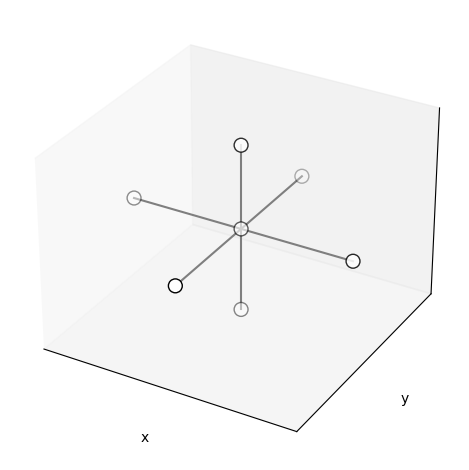

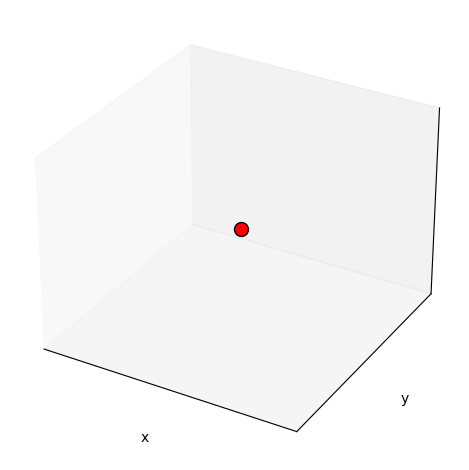

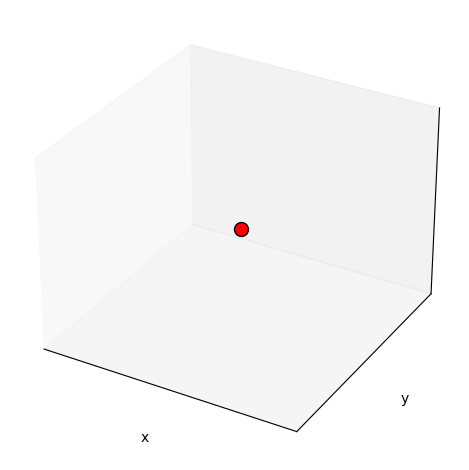

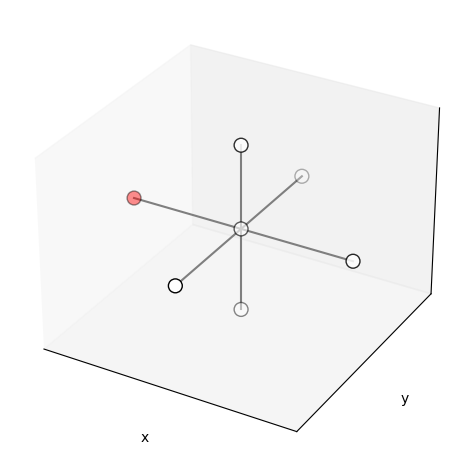

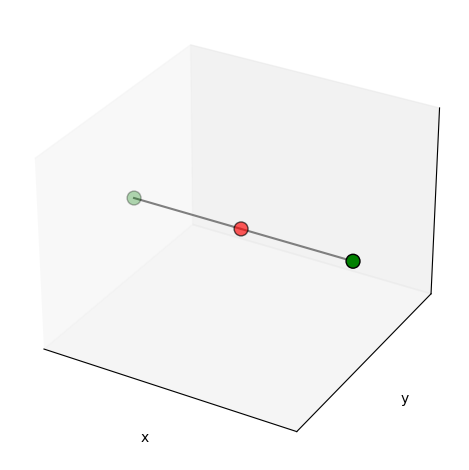

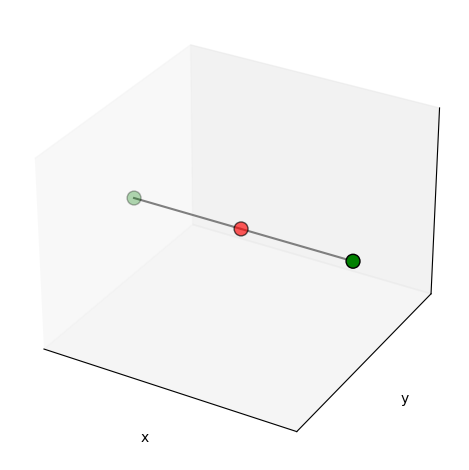

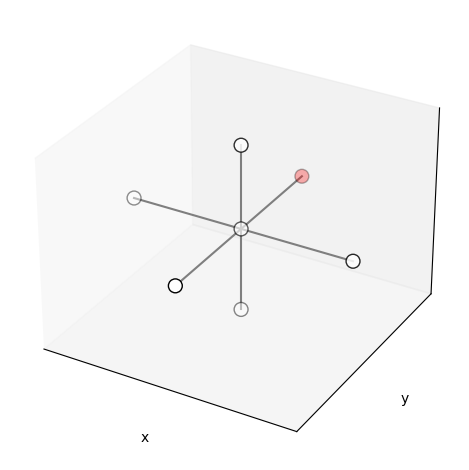

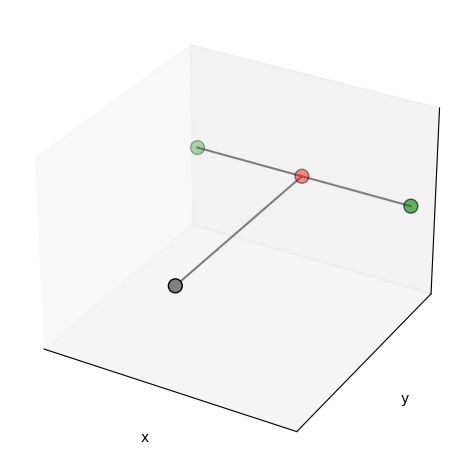

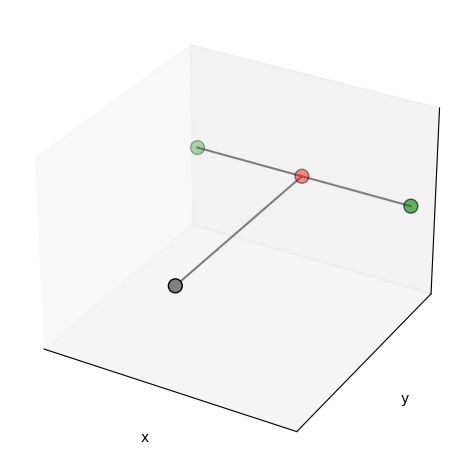

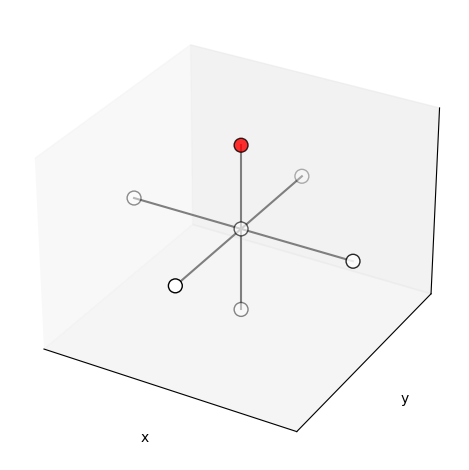

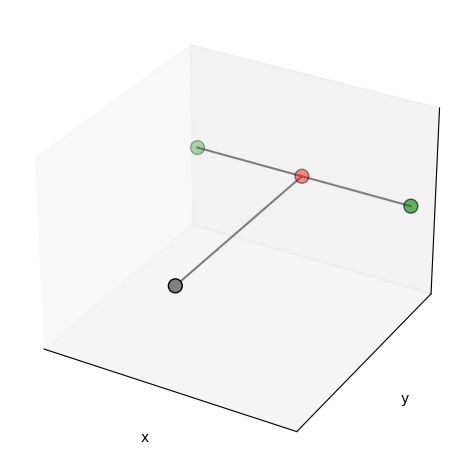

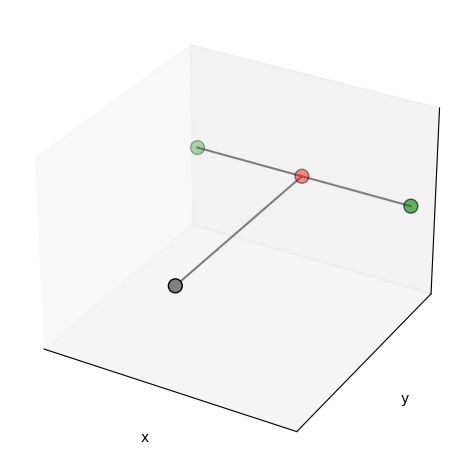

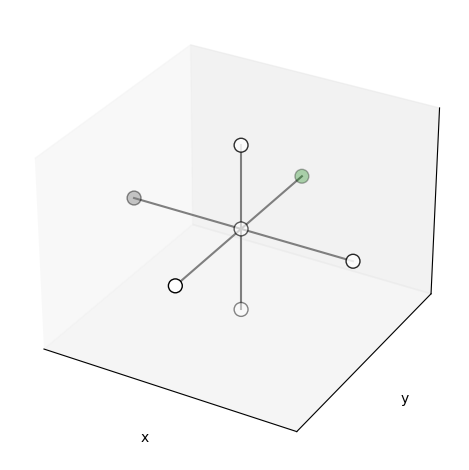

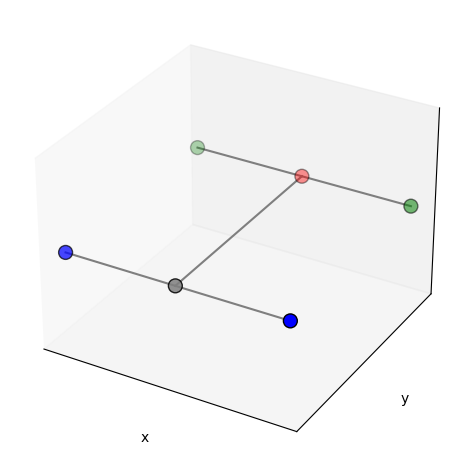

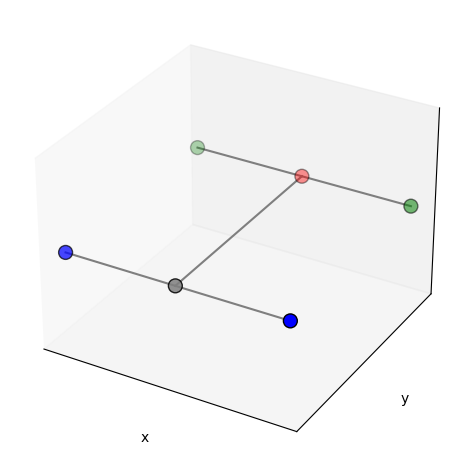

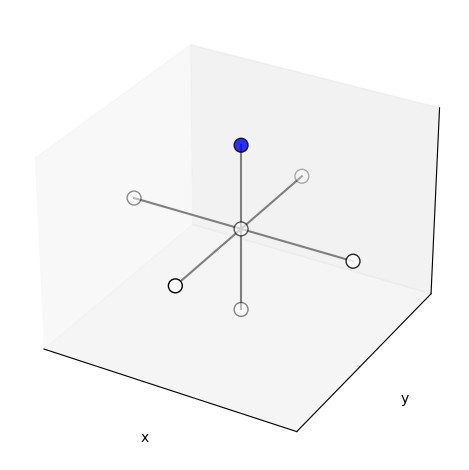

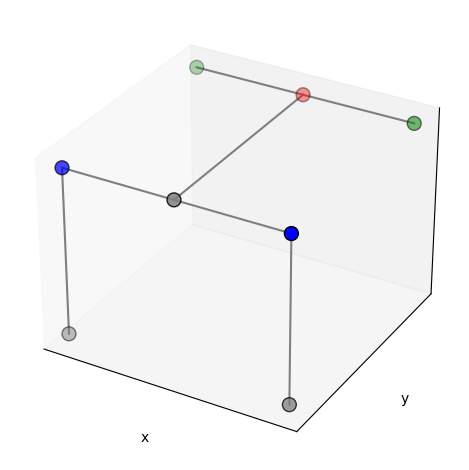

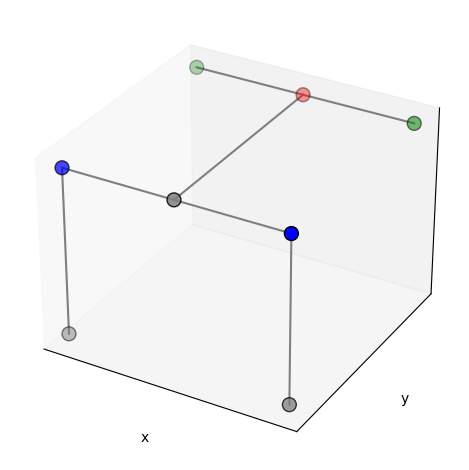

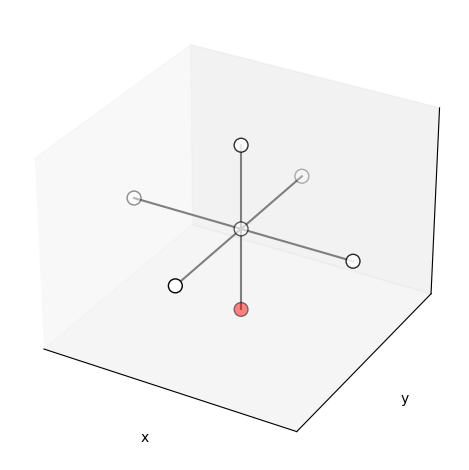

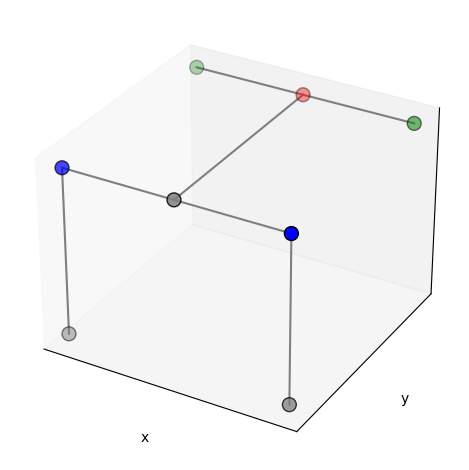

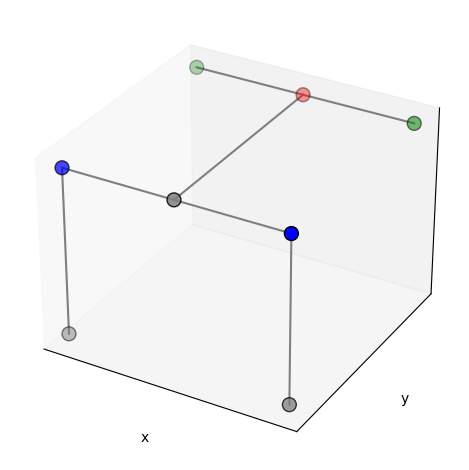

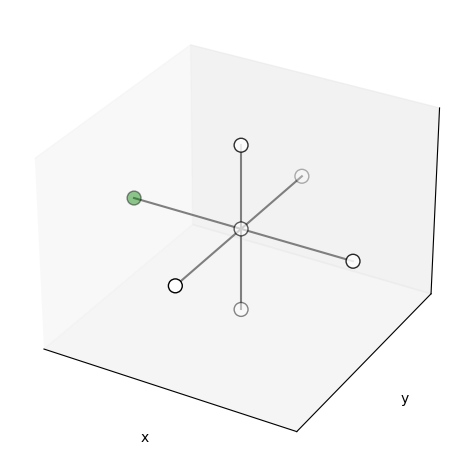

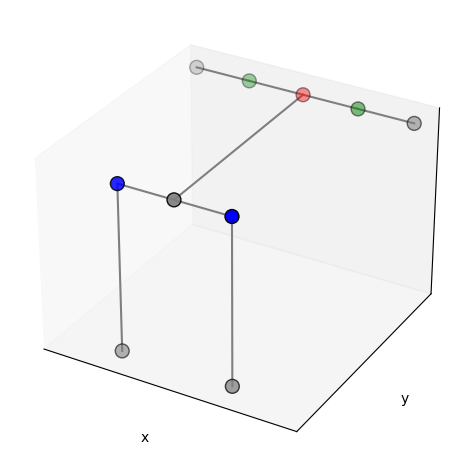

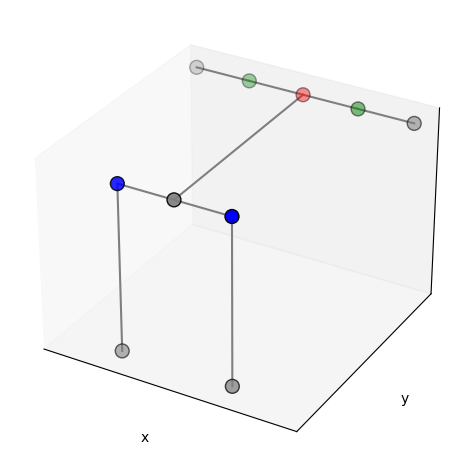

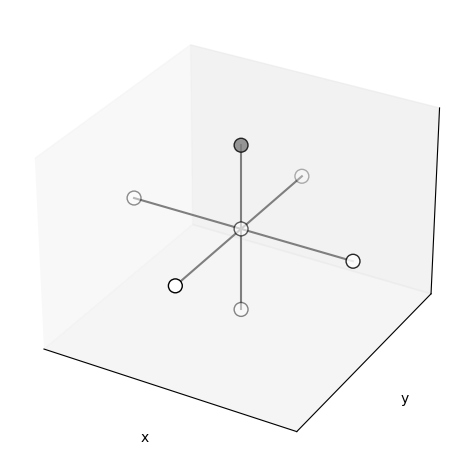

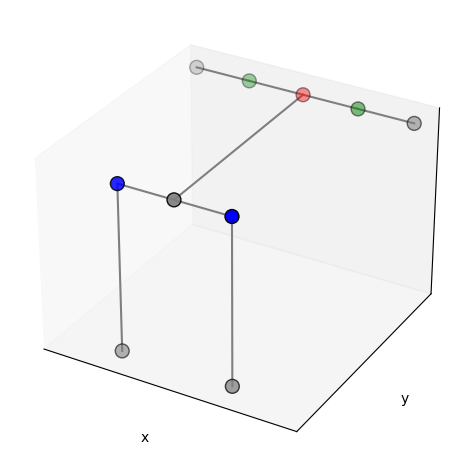

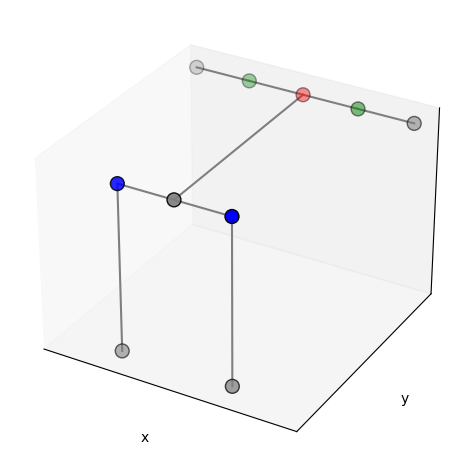

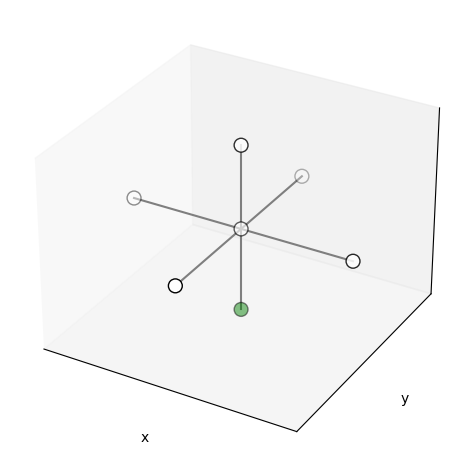

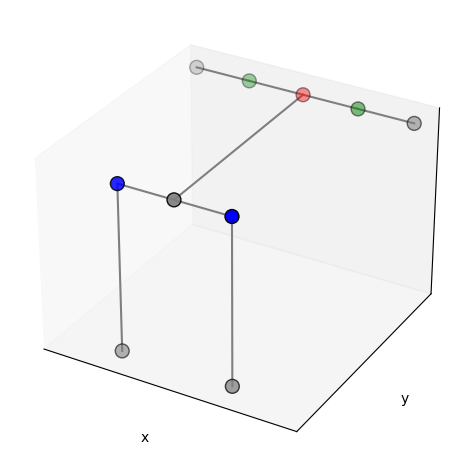

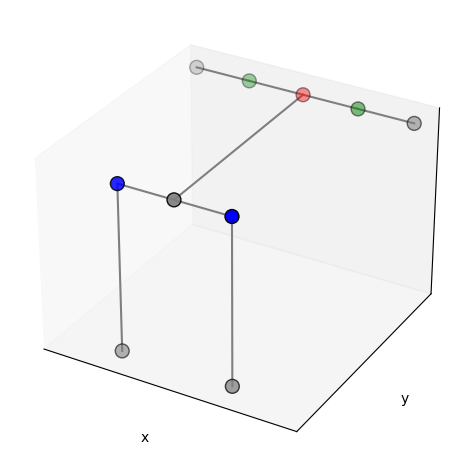

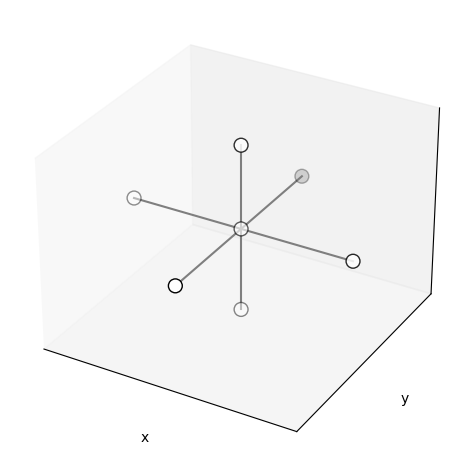

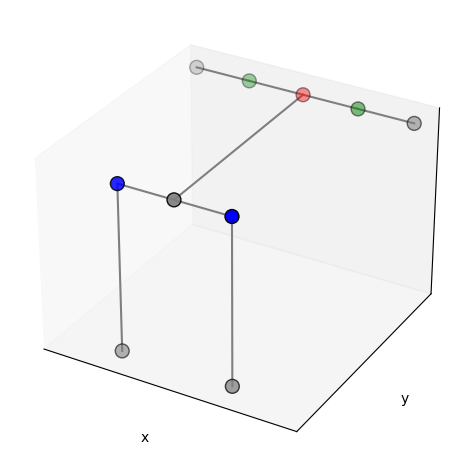

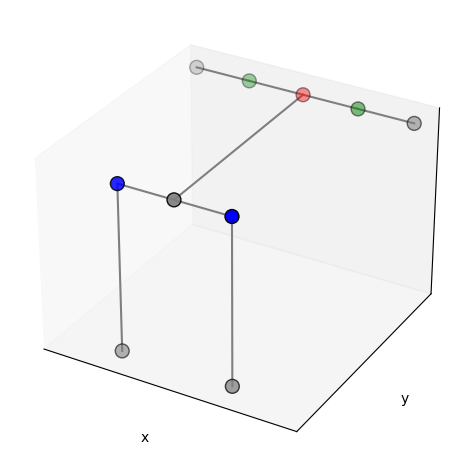

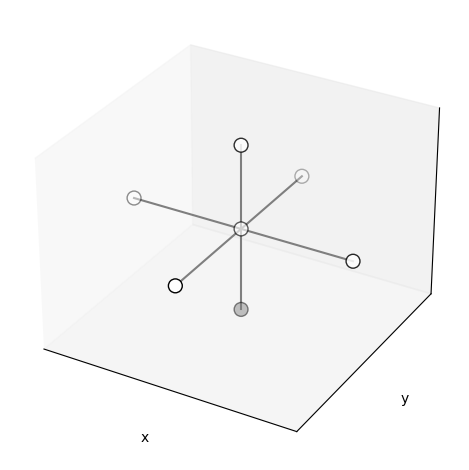

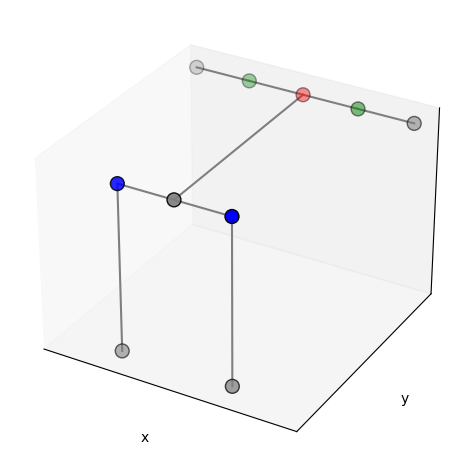

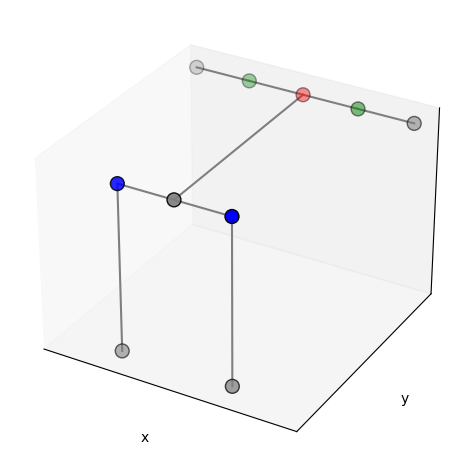

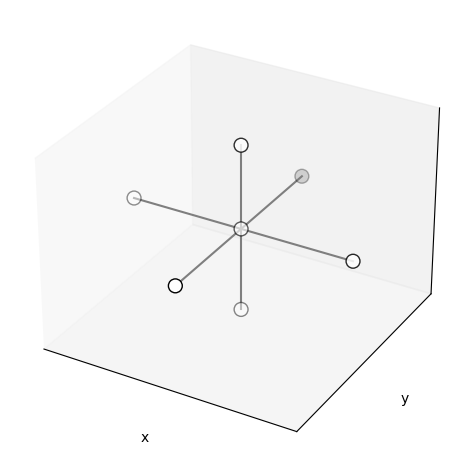

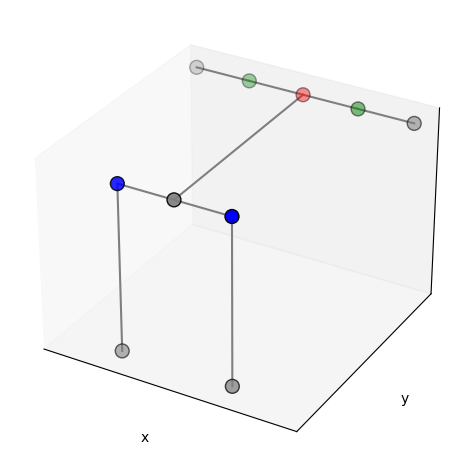

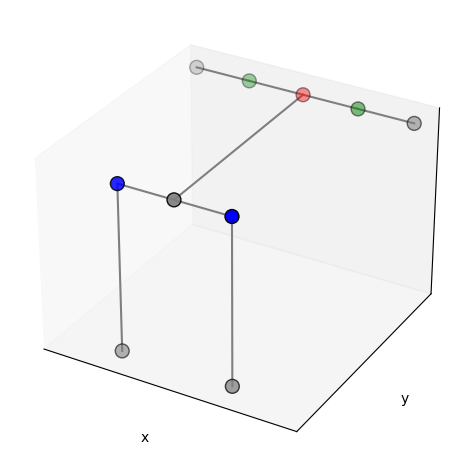

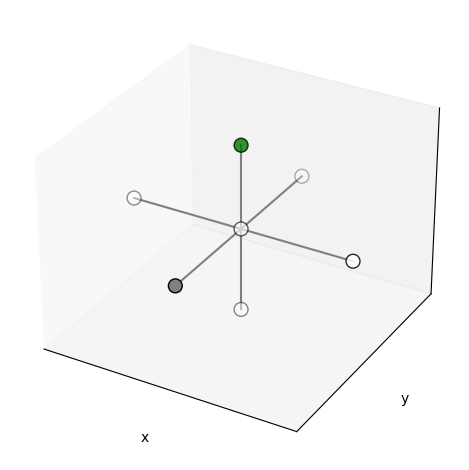

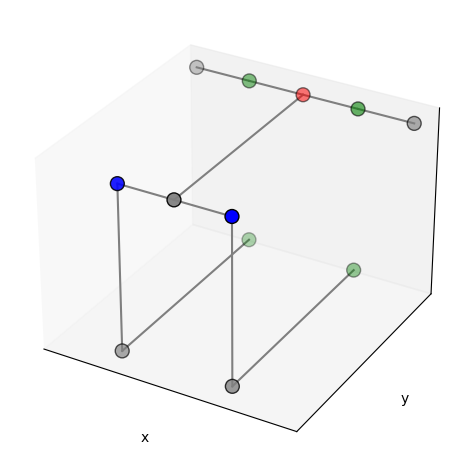

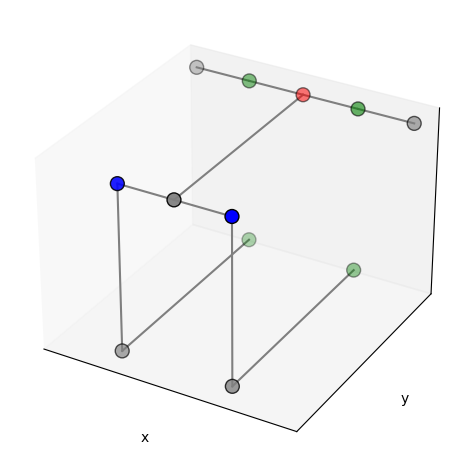

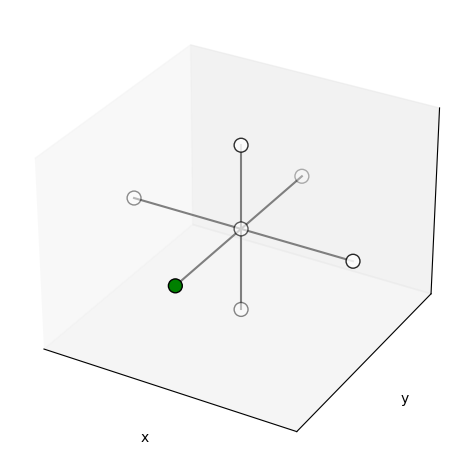

In [7]:
step = 0

while len(grid.points_to_visit) > 0:
    print(f"STEP {step}")
    print(f"{len(grid.points_to_visit)} POINTS LEFT:\t{grid.points_to_visit}")

    """Update the current point to visit"""
    grid.update_current_point()

    """Get the local state wrt the point chosen"""
    current_state = grid.local_state()

    if step > 0 and not current_state.has_non_empty_symbols():
        continue

    """Plot the current state"""
    current_state.plot.show()

    """Create the list of "rule contracts" that are allowed at the current iteration based on the current number of wings and propellers"""
    forbidden_symbols = set()

    if grid.n_wings == max_num_wings and grid.n_rotors == max_num_rotors:
        break

    if grid.n_wings >= max_num_wings:
        forbidden_symbols.add(SymbolType.WING)

    if grid.n_rotors >= max_num_rotors:
        forbidden_symbols.add(SymbolType.ROTOR)

    rules_allowed_contracts = list({k: v for k, v in rule_contracts.items() if k not in forbidden_symbols}.values())
    rules_allowed_contracts = [item for sublist in rules_allowed_contracts for item in sublist]

    if step > 0:
        rules_allowed_contracts = list(filter(lambda x: x.name != "r0", rules_allowed_contracts))

    rule_names_allowed = [r.name for r in rules_allowed_contracts]

    """Force rule r0 to be applied at the first step"""
    if step == 0:
        rules_compatible_contracts = [grammar.rules["r0"]]
    else:
        rules_compatible_contracts = rule_matching(current_state.contract, rules_allowed_contracts)

    """All rule ids that are compatible with the current state"""
    r_id_from_contracts = [rc.name for rc in rules_compatible_contracts]
    r_id_from_contracts_str = "-".join(sorted(r_id_from_contracts))

    print(f"R_C: {r_id_from_contracts_str}")

    """Select one of the compatible rules randomly and apply it to the current state"""
    if len(list(rules_compatible_contracts)) > 0:
        chosen_rule = random.choice(list(rules_compatible_contracts))
        grid.apply_rule(grammar.rules[chosen_rule.name])
    else:
        """If empty apply EMPTY rule"""
        grid.apply_rule(grammar.rules["r19"])

    """Show the newly updated grid"""
    grid.plot_with_edges.show()
    step += 1